In [26]:
# Importing libraries for k-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
# Reading the dataset(iris.csv)
df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,Flowers
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Convert categorical data to numerical data
df['Flowers'] = df['Flowers'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

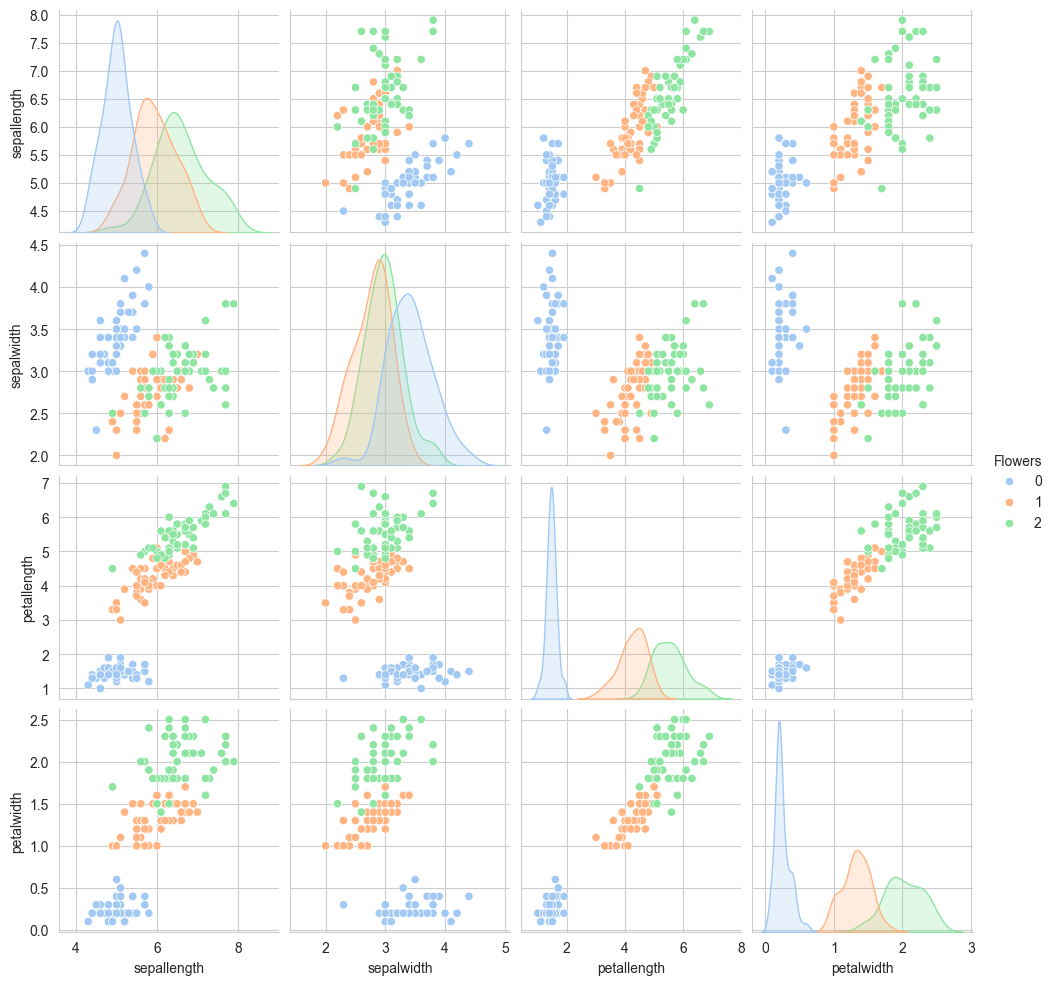

In [29]:
# Setting seaborn style
sns.set_style('whitegrid')

# Pairplot of the dataset
sns.pairplot(df, hue='Flowers', height=2.5, palette='pastel')

In [30]:
# Creating a list of features
features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

# Creating a list of target
target = ['Flowers']

# Creating a dataframe of features
X = df[features]

# Creating a dataframe of target
Y = df[target]

# Scaling the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

<Axes: >

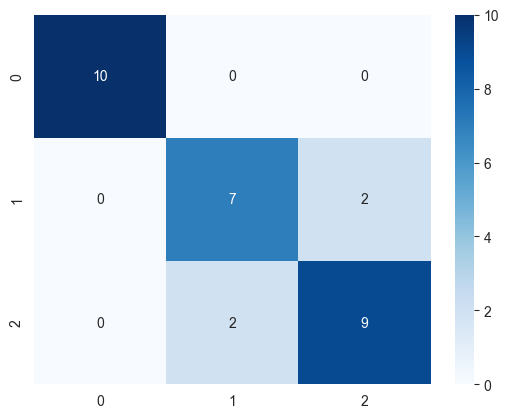

In [31]:
# Creating model
model = KMeans(n_clusters=3, random_state=0, init='k-means++', max_iter=3000, n_init=10, tol=0.0001)

# Fitting the model
model.fit(X_train)

# Predicting the model
Y_pred = model.predict(X_test)

# Creating a dataframe of predicted values
Y_pred = pd.DataFrame(Y_pred, columns=['Flowers'])

# Concatenating the dataframes
result = pd.concat([Y_test, Y_pred], axis=1)

# Creating a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

Accuracy Score: 0.867


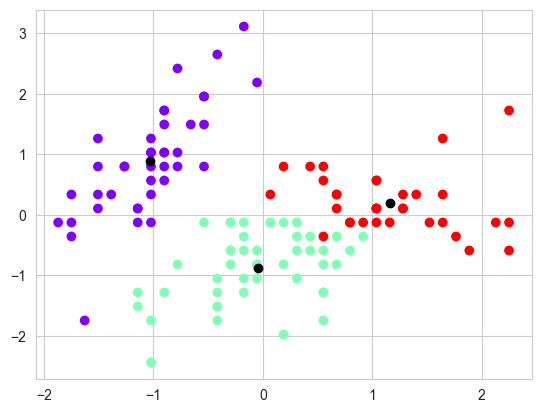

In [32]:
# Accuracy of the model
print('Accuracy Score: %.3f' % accuracy_score(Y_test, Y_pred))

# Visualizing the clusters
plt.scatter(X_train[:, 0], X_train[:, 1], c=model.labels_, cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black')
plt.show()